<a href="https://colab.research.google.com/github/Kowsthubha/LendingClubCaseStudy/blob/master/Lending_Club_default_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reading the Data from the loan.csv**




In [2]:
import pandas as pd
loan = pd.read_csv('loan.csv', low_memory=False)

print(loan.shape)
loan.head()


(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


**The data frame has 39717 Rows and 111 Columns**

In [3]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Step-1 Data Cleaning
Delete unnecessary Columns/Rows

In [5]:
# Read column names from file
cols = list(pd.read_csv("loan.csv", nrows =1))
print(cols)
print(len(cols))

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

DataFrame has 111 columns, identify the unnecessary columns

Unnecessary columns list 

Find the isna/missing values count from below

In [6]:
loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Drop na or null value columns
Which yields to 57 Columns from 111 Columns

In [7]:
loan.dropna(axis = 1, how = 'all', inplace = True)
print(loan.shape)
loan.head()

(39717, 57)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [8]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

MISSING VALUES: We can see from above that following columns are missing values, hence let's get rid of these columns as these values cannot be imputed.

mths_since_last_delinq

mths_since_last_record

next_pymnt_d


In [9]:
missing_value_cols = ['mths_since_last_delinq','mths_since_last_record','next_pymnt_d']

loan.drop(missing_value_cols, axis = 1, inplace = True)

loan.shape
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


SINGLE VALUE COLUMNS:

Get the unique value counts for each column

In [10]:
#count unique values in each column
loan_unique_col_value_count = loan.nunique()
loan_unique_col_value_count = loan_unique_col_value_count.to_frame()
type(loan_unique_col_value_count)

#loan_unique_col_value_count.columns = ["ColumnName", "UniqueCount"]
# Assign header to Existing DataFrame
column_names=["UniqueCount"]
loan_unique_col_value_count.columns = column_names

print(loan_unique_col_value_count)
loan_unique_col_value_count.head()

                            UniqueCount
id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26527
purpose                              14
title                             19615
zip_code                            823
addr_state                           50


,UniqueCount
id,39717
member_id,39717
loan_amnt,885
funded_amnt,1041
funded_amnt_inv,8205


### Get the single value columns





In [11]:
loan_unique_col_value_count[loan_unique_col_value_count["UniqueCount"] == 1]


,UniqueCount
pymnt_plan,1
initial_list_status,1
collections_12_mths_ex_med,1
policy_code,1
application_type,1
acc_now_delinq,1
chargeoff_within_12_mths,1
delinq_amnt,1
tax_liens,1


### Remove the single value columns
pymnt_plan	1

initial_list_status	1

collections_12_mths_ex_med	1

policy_code	1

application_type	1

acc_now_delinq	1

chargeoff_within_12_mths	1

delinq_amnt	1

tax_liens


In [12]:
single_value_cols = ['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens']

loan.drop(single_value_cols, axis = 1, inplace = True)

print(loan.shape)
loan.head()


(39717, 45)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


**45 Columns as Below**


In [13]:
# Read column names of loan Dataframe
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

## Remove further unnecessary columns
1. Remove id columns - 'id','member_id'
2. Description column - 'desc'
3. Columns not needed  are - 'url','title','emp_title',
4. Incomplete value columns - 'zip_code',
5. Invalue addition columns - 'next_pymnt_d'

In [14]:
unnecessary_cols = ['id','member_id','desc','url','title','zip_code','emp_title']
loan.drop(unnecessary_cols, axis = 1, inplace = True)

print(loan.shape)
loan.head()

(39717, 38)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [15]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [16]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

### After Data cleanup we have 38 Columns

In [17]:
print(loan.shape)
loan.head()

(39717, 38)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


### Check for missing values

In [18]:
(loan.isna().sum()/len(loan.index))*100

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.125891
total_acc                  0.000000
out_prncp                  0.000000
out_prncp_inv              0.000000
total_pymnt                0

# Handling Missing Value Rows


*   Missing value columns are
 'emp_length', 'revol_util', 'last_pymnt_d', 'pub_rec_bankruptcies'




In [19]:
print("Mode : " + loan.emp_length.mode()[0])
loan.emp_length.value_counts()

Mode : 10+ years


10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

### From the above result shows that the mode value for emp_length has much higher frequency than that of the next most frequent value.

*   This means that we can assign safely the value of mode to the null values in the column.
*   Also by considering that the missing values are in very low percentage. 
*   So we are going to impute with the mode value safely which doesn't affect the analysis much.






In [20]:
loan.emp_length.fillna(loan.emp_length.mode()[0], inplace = True)
loan.emp_length.isna().sum()

0

In [21]:
loan.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan.revol_util.isna().sum()

0

### We can safely remove columns 'last_pymnt_d' and 'pub_rec_bankruptcies' as these values are not found as significant for any analysis

In [22]:
loan.drop(['last_pymnt_d','pub_rec_bankruptcies'], axis = 1, inplace = True)

print(loan.shape)
loan.head()

(39667, 36)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,May-16
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,May-16
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-16
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,May-16


# Data Standardizing


*   revol_util and int_rate columns can be standardized as decimal numbers without the '%' sign
*   "emp_length" shall be standardized as below 

      { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }



In [23]:
loan.revol_util = pd.to_numeric(loan.revol_util.apply(lambda x : x.split('%')[0]))

In [24]:
loan.int_rate = pd.to_numeric(loan.int_rate.apply(lambda x : x.split('%')[0]))

In [25]:
loan.emp_length = pd.to_numeric(loan.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))


In [26]:
print(loan.shape)
loan.head()

(39667, 36)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,May-16
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,...,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,May-16
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-16
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,...,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,May-16


# **Outliers Finding**

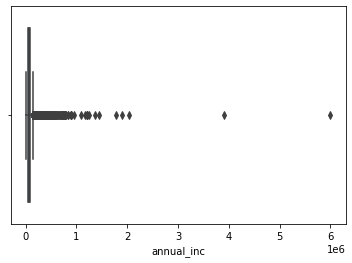

In [27]:
## import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.boxplot(loan['annual_inc'])

### Boxplot clearly indicates the presence of outliers.

1. So, Removing them.
2. Let's see the quantile info and take an appropriate action.
3. The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
4. So, considering threshold for removing outliers as 0.95

---





In [28]:
quantile_info = loan.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.00
0.75     82400.00
0.90    116000.00
0.95    142000.00
0.97    165996.00
0.98    187000.00
0.99    234997.36
Name: annual_inc, dtype: float64

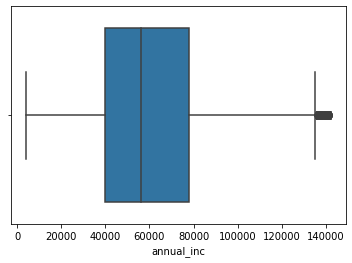

In [29]:
per_95_annual_inc = loan['annual_inc'].quantile(0.95)
loan = loan[loan.annual_inc <= per_95_annual_inc]

sns.boxplot(loan.annual_inc)

## Now the data looks good for "annual_inc"

**Let's Analyze few more numerical values which could potentially has outliers**


*   loan_amnt
*   dti
*   funded_amnt_inv



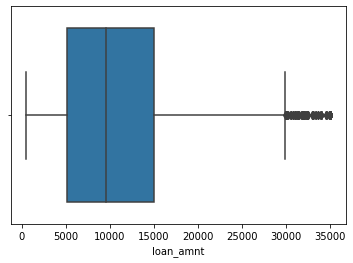

In [30]:
sns.boxplot(loan.loan_amnt)

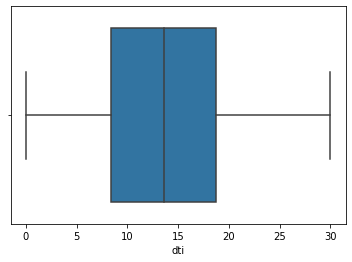

In [31]:
sns.boxplot(loan.dti)

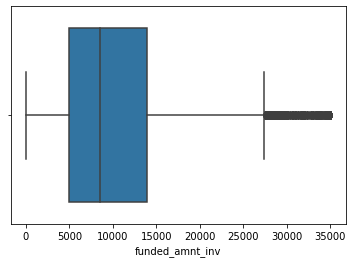

In [32]:
sns.boxplot(loan.funded_amnt_inv)

### We can find that there are some values are far from distribution, but the distribution is pretty continuous. So there is no need to remove outliers for the above columns so we are good with these columns

# **Data Visualization**

### Data Visualization is the process of analyzing data in the form of graphs or maps, making it a lot easier to understand the trends or patterns in the data. There are various types of visualizations – 

*   Univariate analysis
*   Bi-Variate analysis
*   Multi-Variate analysis




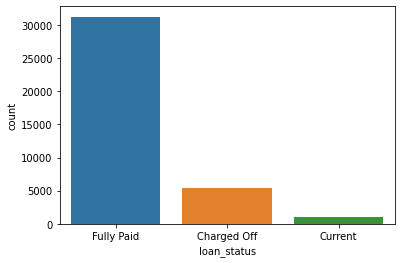

In [33]:
sns.countplot(x = 'loan_status', data = loan)

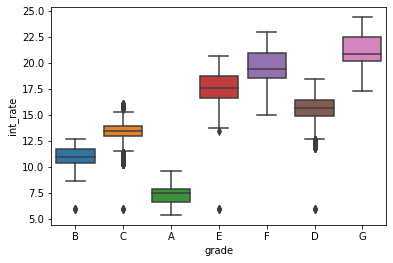

In [34]:
sns.boxplot( x="grade", y='int_rate', data=loan )
plt.show()

In [35]:
loan.sub_grade = pd.to_numeric(loan.sub_grade.apply(lambda x : x[-1]))
loan.sub_grade.head()

0    2
1    4
2    5
3    1
4    5
Name: sub_grade, dtype: int64

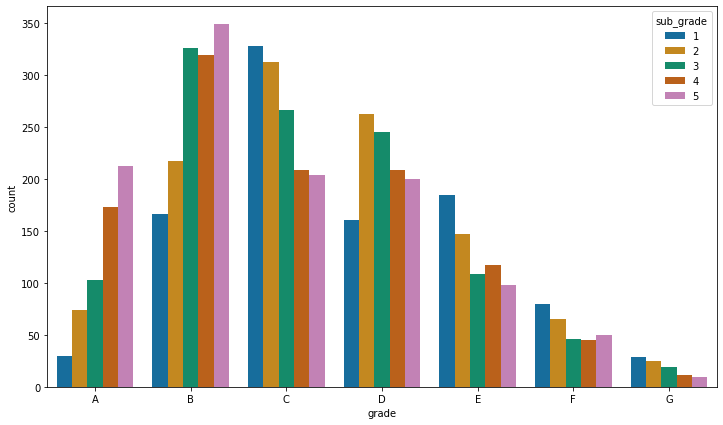

In [36]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan[loan.loan_status == 'Charged Off'])


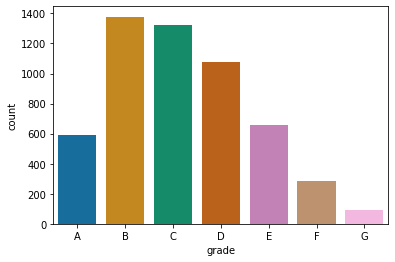

In [37]:
sns.countplot(x = 'grade', data = loan[loan.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])


# Analyzing the Loan Purpose

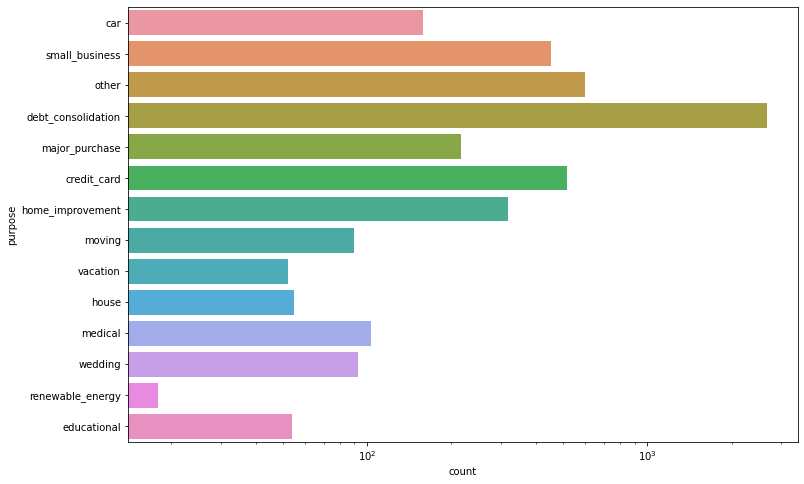

In [38]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan[loan.loan_status == 'Charged Off'])

**Creating bins for some numerical variable to make them categorical**

In [39]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan['int_rate_groups'] = pd.cut(loan['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan['open_acc_groups'] = pd.cut(loan['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan['revol_util_groups'] = pd.cut(loan['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan['total_acc_groups'] = pd.cut(loan['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan['annual_inc_groups'] = pd.cut(loan['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])


In [40]:
# Viewing new bins created
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,...,0.00,0.00,0.00,171.62,May-16,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,...,0.00,117.08,1.11,119.66,Sep-13,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,...,0.00,0.00,0.00,649.91,May-16,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,...,16.97,0.00,0.00,357.48,Apr-16,13%-17%,2-10,20-40,20-37,31k-58k
4,3000,3000,3000.0,60 months,12.69,67.79,B,5,1,RENT,...,0.00,0.00,0.00,67.79,May-16,9%-13%,10-19,40-60,37-55,58k-85k


**Analyzing interest rate wrt the interest rate bins created**

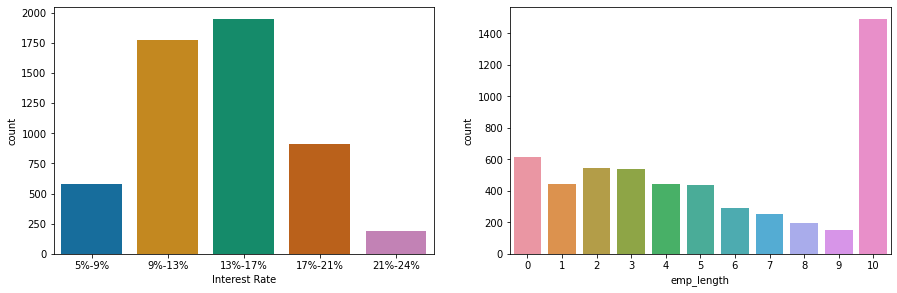

In [41]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan[loan.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=loan[loan.loan_status == 'Charged Off'])


**Similarly analyzing open_acc,revol_util,total_acc,annual_inc**

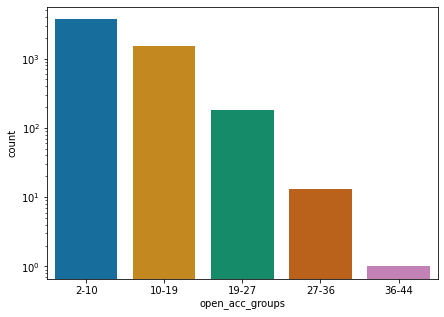

In [42]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loan[loan.loan_status == 'Charged Off'])

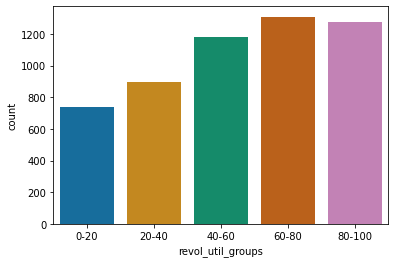

In [43]:
sns.countplot(x='revol_util_groups', data=loan[loan.loan_status == 'Charged Off'])

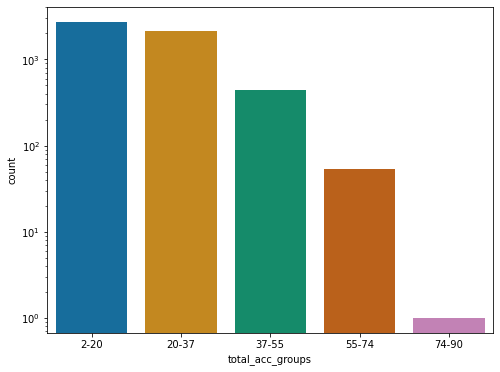

In [44]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=loan[loan.loan_status == 'Charged Off'])

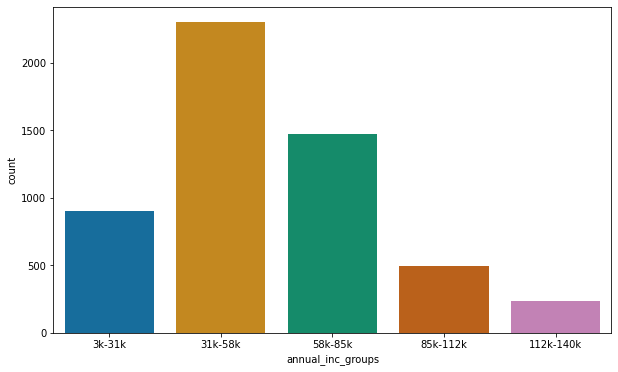

In [45]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=loan[loan.loan_status == 'Charged Off'])


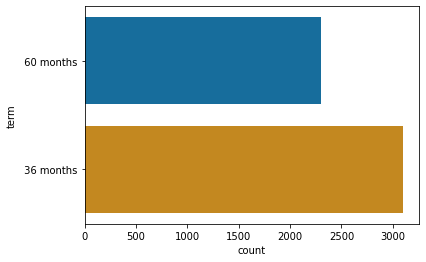

In [46]:
sns.countplot(y='term', data=loan[loan['loan_status']=='Charged Off'])

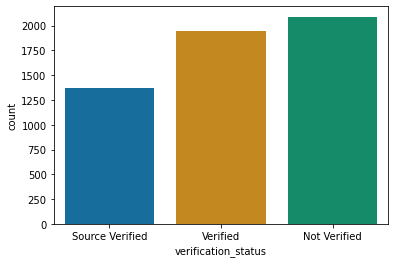

In [47]:
sns.countplot(x='verification_status', data=loan[loan['loan_status']=='Charged Off'])

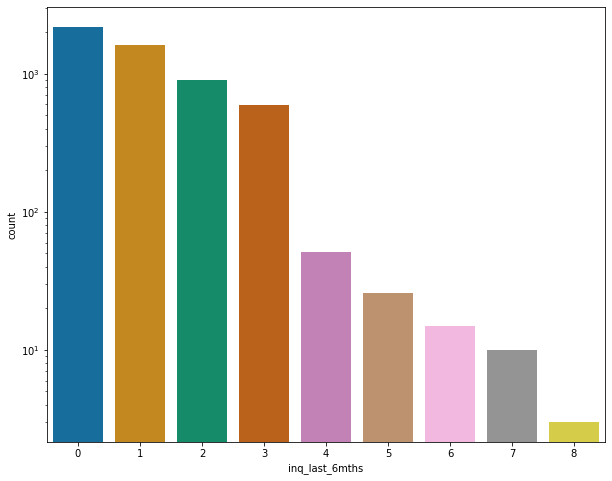

In [48]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loan[loan['loan_status']=='Charged Off'])

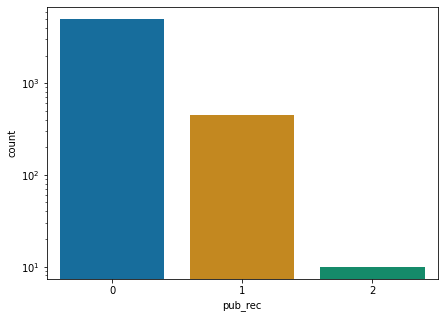

In [49]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=loan[loan['loan_status']=='Charged Off'])

**Analyzing home_ownership**

In [50]:
#checking unique values for home_ownership
loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

**There are only 3 records with 'NONE' value in the data. So replacing the value with 'OTHER'**

In [51]:
#replacing 'NONE' with 'OTHERS'
loan['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [52]:
#checking unique values for home_ownership again
loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

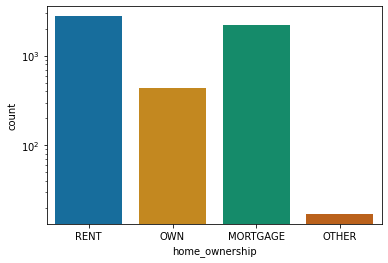

In [53]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan[loan['loan_status']=='Charged Off'])

# **Analyzing by issued month and year**

In [54]:
## Extracting month and year
df_month_year = loan['issue_d'].str.partition("-", True)     
loan['issue_month']=df_month_year[0]                       
loan['issue_year']='20' + df_month_year[2]

loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,issue_month,issue_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,...,0.00,171.62,May-16,9%-13%,2-10,80-100,2-20,3k-31k,Dec,2011
1,2500,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,...,1.11,119.66,Sep-13,13%-17%,2-10,0-20,2-20,3k-31k,Dec,2011
2,2400,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,...,0.00,649.91,May-16,13%-17%,2-10,80-100,2-20,3k-31k,Dec,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,...,0.00,357.48,Apr-16,13%-17%,2-10,20-40,20-37,31k-58k,Dec,2011
4,3000,3000,3000.0,60 months,12.69,67.79,B,5,1,RENT,...,0.00,67.79,May-16,9%-13%,10-19,40-60,37-55,58k-85k,Dec,2011


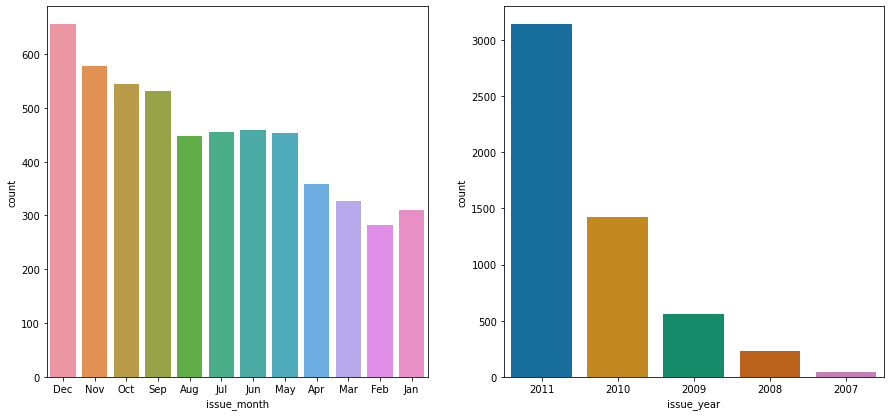

In [55]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan[loan['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=loan[loan['loan_status']=='Charged Off'])

### Maximum number of defaults occured when the loan was sanctioned/issued in Dec. Loan issued in the year 2011 were also as compared to other years
**Analyzing installment,dti, loan_amnt**

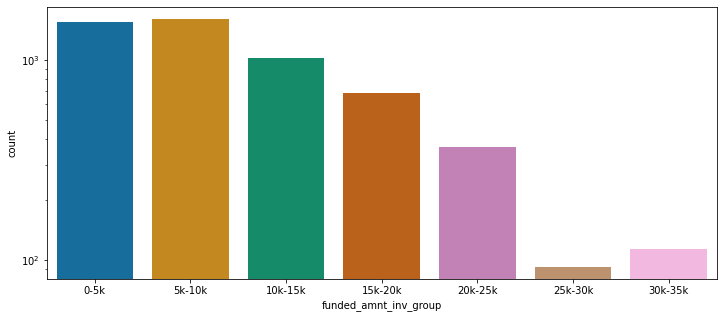

In [56]:
loan['installment_groups'] = pd.cut(loan['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan['funded_amnt_inv_group'] = pd.cut(loan['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan['loan_amnt_groups'] = pd.cut(loan['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan['dti_groups'] = pd.cut(loan['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=loan[loan['loan_status']=='Charged Off'])



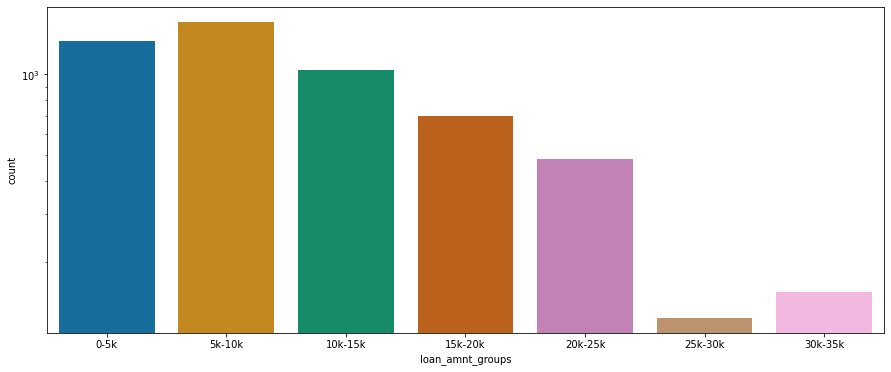

In [57]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan[loan['loan_status']=='Charged Off'])

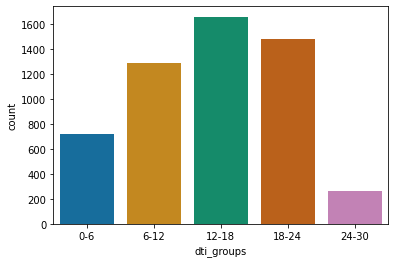

In [58]:
sns.countplot(x='dti_groups', data=loan[loan['loan_status']=='Charged Off'])

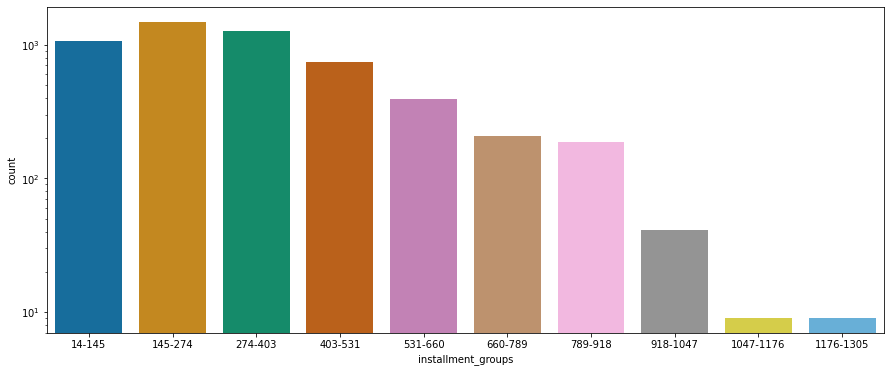

In [59]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan[loan['loan_status']=='Charged Off'])

# **Observations**
### The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when :


    *   Applicants who use the loan to clear other debts
    *   Applicants having house_ownership as 'RENT'
    *   Applicants who have an income of range 31201 - 58402
    *   Applicants who receive interest at the rate of 13-17%
    *   Applicants with employement length of 10
    *   Applicants who have 20-37 open_acc
    *   Loan amount is between 5429 - 10357
    *   Dti is between 12-18
    *   When funded amount by investor is between 5000-10000
    *   Dti is between 12-18
    *   Loan amount is between 5429 - 10357
    *   Term of 36 months
    *   When monthly installments are between 145-274
    *   When the no of enquiries in last 6 months is 0
    *   When the number of derogatory public records is 0
    *   When the loan status is Not verified
    *   When the purpose is 'debt_consolidation'
    *   total grade of 'B5' level
    *   Grade is 'B'



**Also there is a very interesting observation from the date issued. The late months of an year indicated the high possibility of defaulting.**

  * The high number of loan defaults in 2011 could be due to the financial crisis in USA (Assuming the data is of US origin)


# **Analysing annual income with other columns for more insights**

## **1. Annual income vs home ownership**

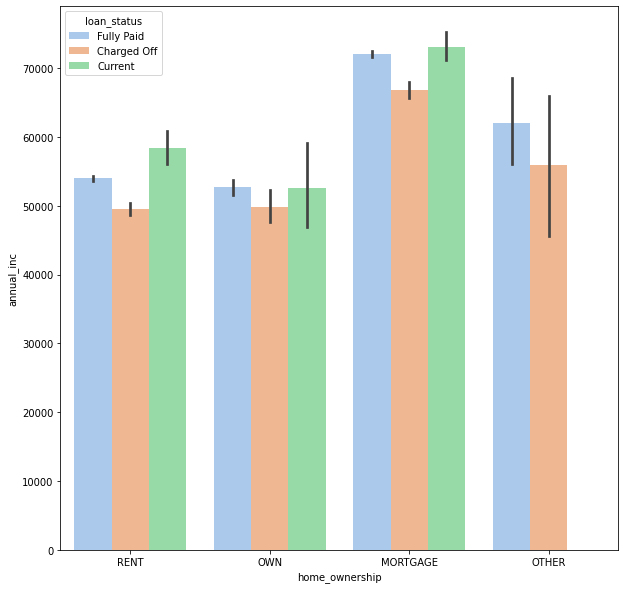

In [60]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

## Though the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest.

    *   Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

## **2. Annual income vs loan purpose**

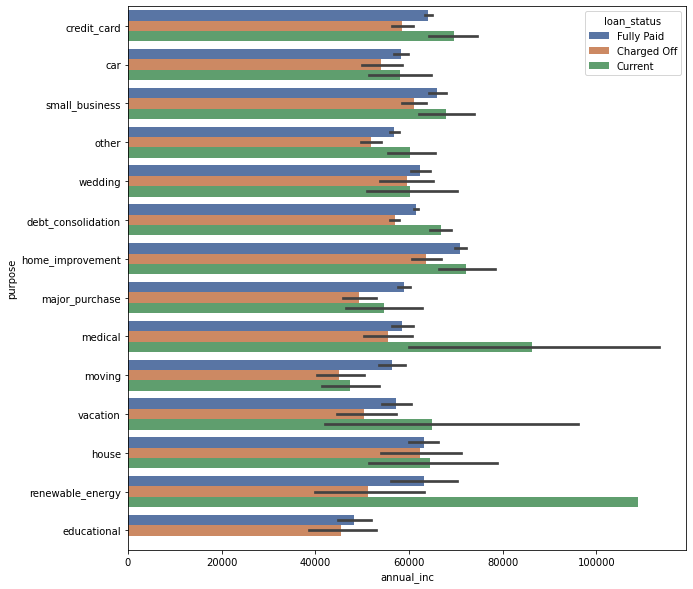

In [61]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

# **Annual Income vs Loan amount**

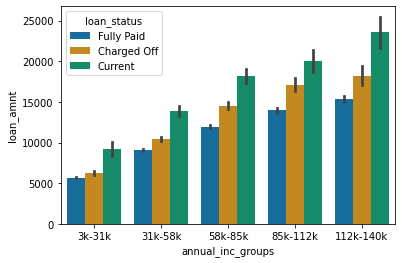

In [62]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan)

## Across all the income groups, the loan_amount is higher for people who defaulted.

## **3. Annual income vs int_rate**

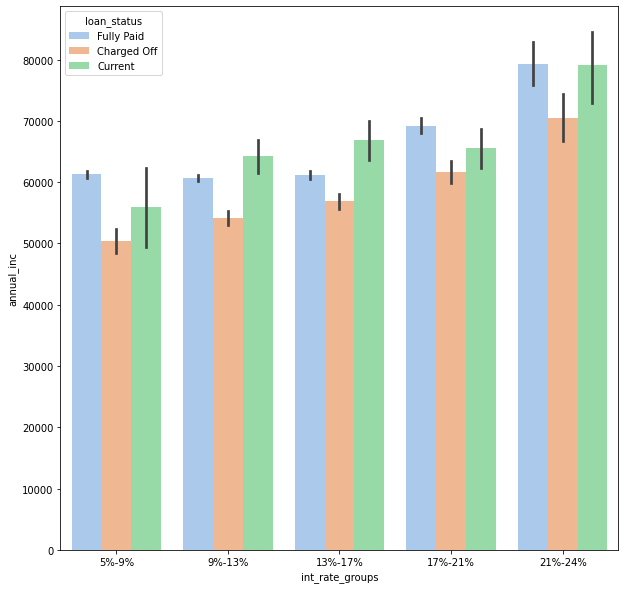

In [63]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

# Analysing loan_amount with other columns for more insights

## **1. Loan Amount vs Interest Rate**

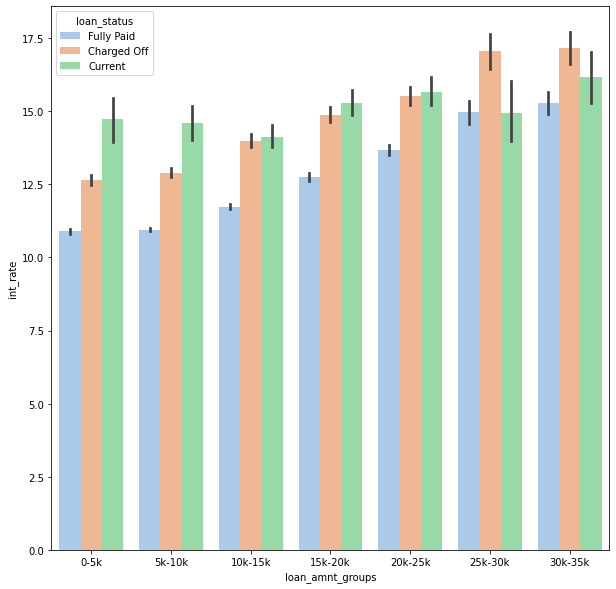

In [64]:
plt.figure(figsize=(10,10))
sns.barplot(data = loan,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

## **2. Loan vs Loan purpose**

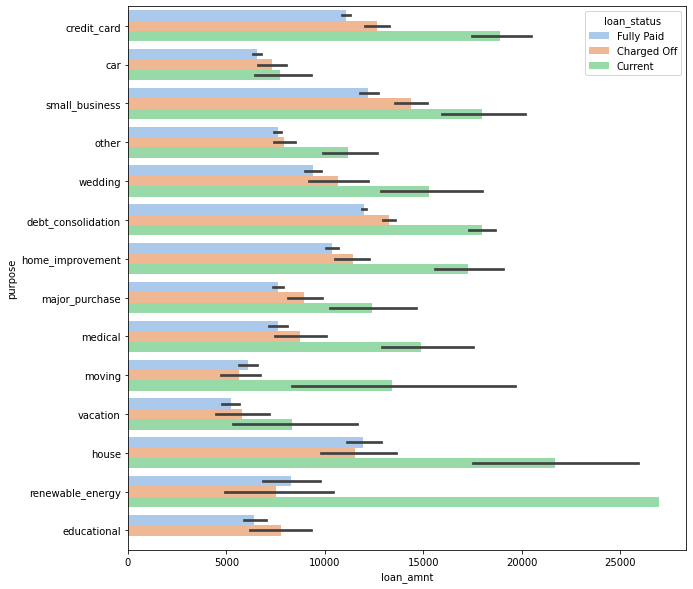

In [65]:
plt.figure(figsize=(10,10))
sns.barplot(data = loan,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

## **3. Loan vs House Ownership**

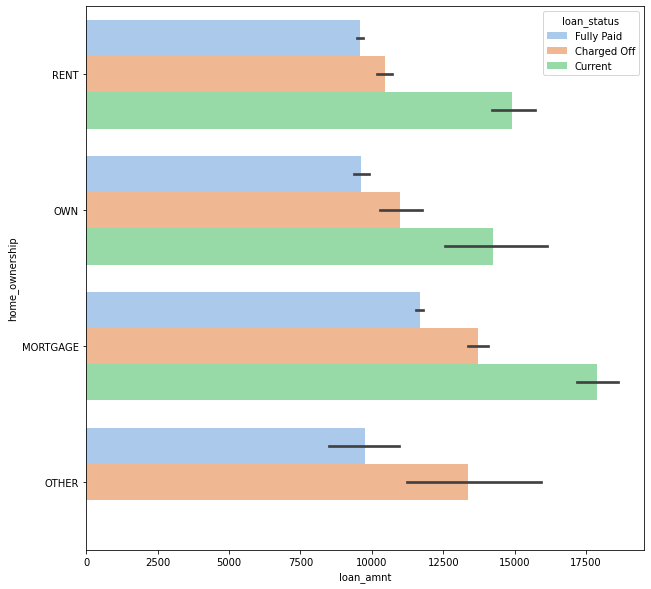

In [66]:
plt.figure(figsize=(10,10))
sns.barplot(data = loan,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

## **4. Loan amount vs month issued and year issued**

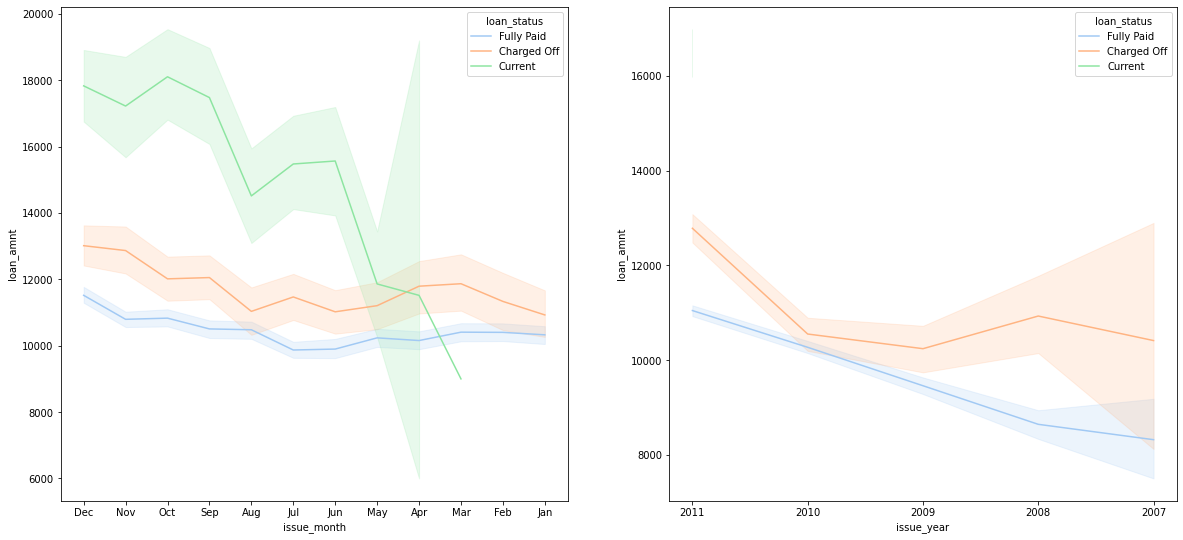

In [67]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data = loan,y='loan_amnt', x='issue_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data = loan,y='loan_amnt', x='issue_year', hue ='loan_status',palette="pastel")

## **5. Loan amount vs Grade**

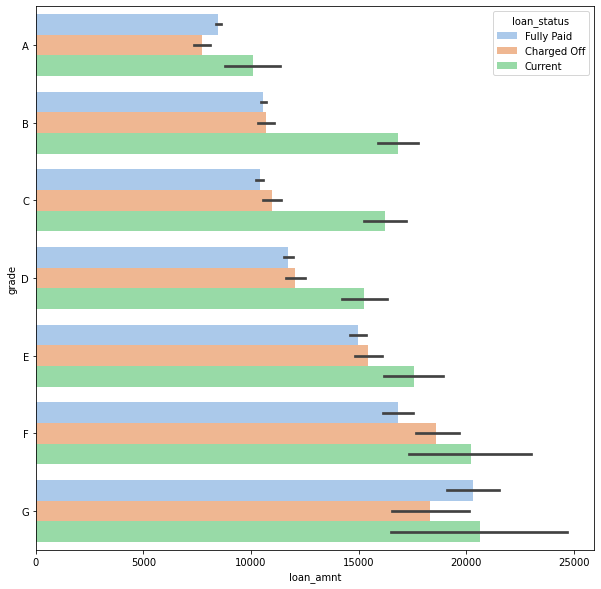

In [68]:
plt.figure(figsize=(10,10))
sns.barplot(data = loan,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()


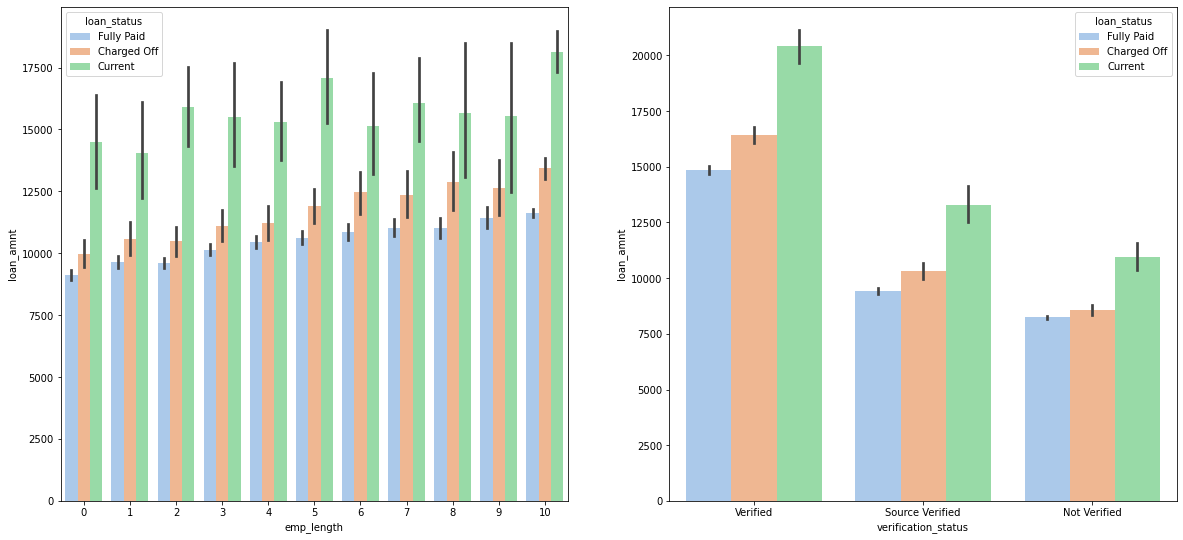

In [69]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =loan,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")


## **Employees with longer working history got the loan approved for a higher amount.**
    *  Looking at the verification status data, verified loan applications tend to have higher loan amount. Which might indicate that the firms are first verifying the loans with higher values.

## **Grade vs Interest rate**

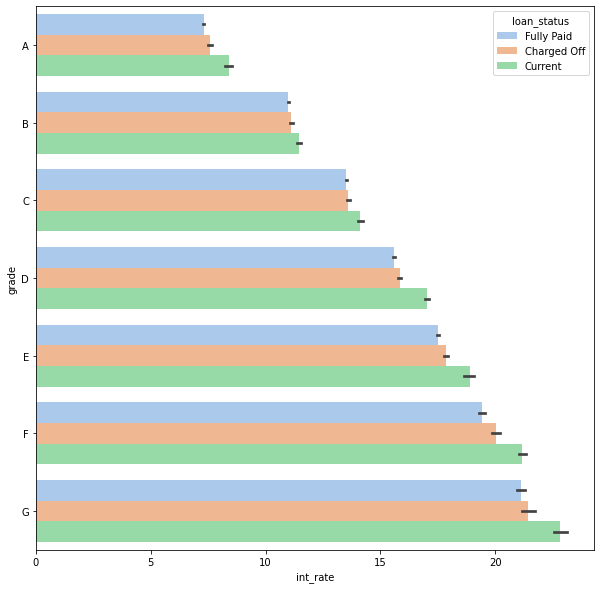

In [70]:
plt.figure(figsize=(10,10))
sns.barplot(data = loan,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()


<Figure size 432x288 with 0 Axes>

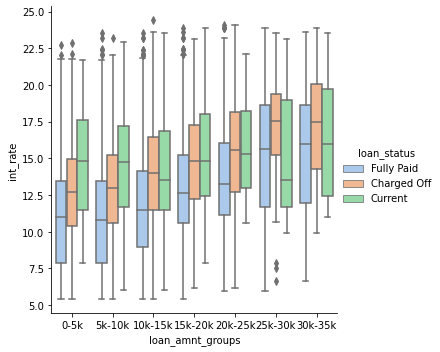

In [71]:
# fig,ax = plt.subplots(figsize = (15,6))
plt.tight_layout()
sns.catplot(data = loan,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')




## **The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups.**
    * This can be a pretty strong driving factor for loan defaulting.

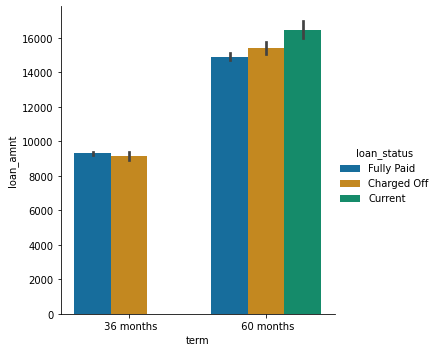

In [72]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan,hue = 'loan_status', kind = 'bar')

## **Applicants who applied and defaulted have no significant difference in loan_amounts.**
* Which means that applicants applying for long term has applied for more loan.

# **Observations**
## The above analysis with respect to the charged off loans. There is a more probability of defaulting when :

* Applicants whose home ownership is MORTGAGE and have income of 60-70k
* Applicants taking loan for 'home improvement' and have income of 60k -70k
* Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
* Applicants who have taken a loan for small business and the loan amount is greater than 14k
* Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
* Applicants whose home ownership is MORTGAGE and have loan of 14-16k
* When employment length is 10yrs and loan amount is 12k-14k
* When grade is F and loan amount is between 15k-20k
* For grade G and interest rate above 20%
* When the loan is verified and loan amount is above 16k


**Library Version Used**

import libraries

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [73]:
!python --version

Python 3.8.15


In [81]:
pd.__version__

'1.3.5'

In [82]:
sns.__version__

'0.11.2'